# Linear & Logistics Regression, Ridge(L2) & Lasso(L1) regularization Feature Selection Methods

## 1. Linear Regression

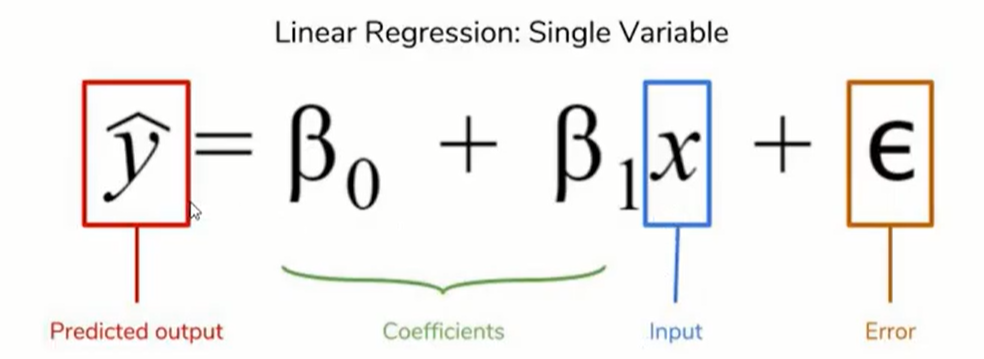

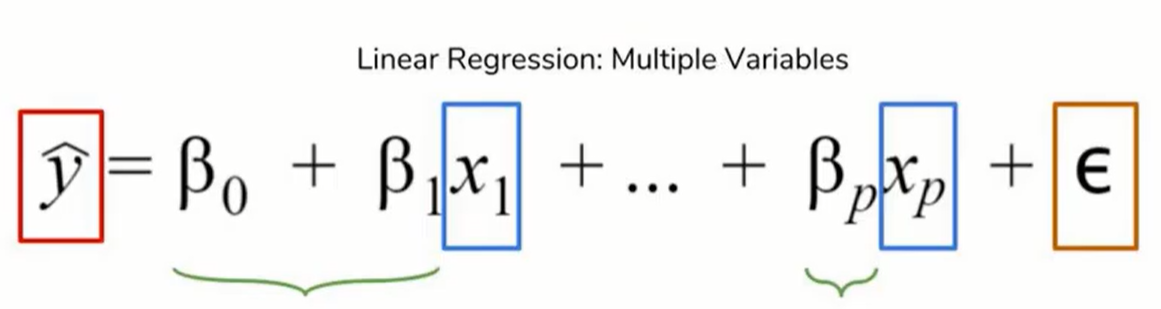

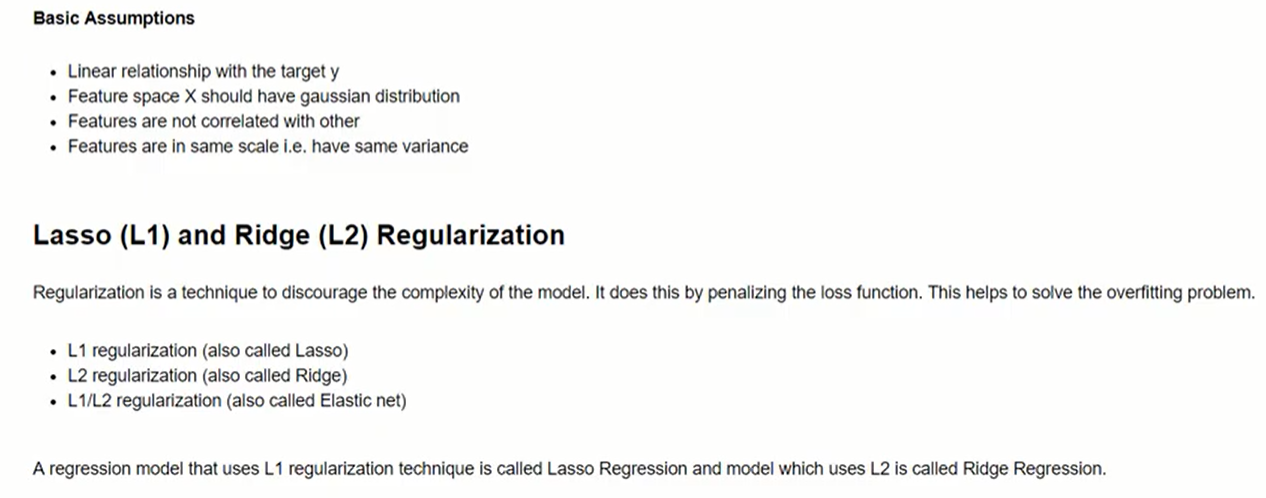

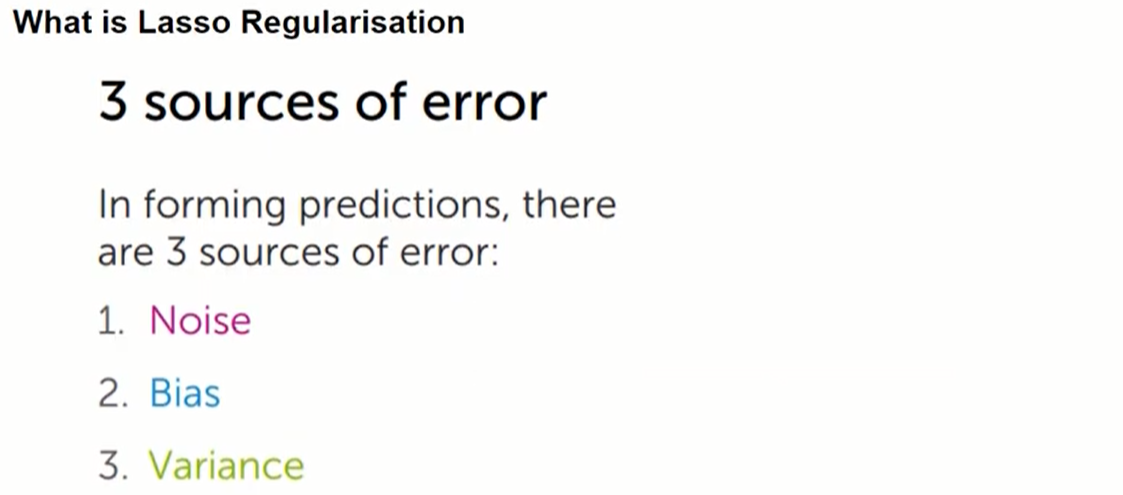

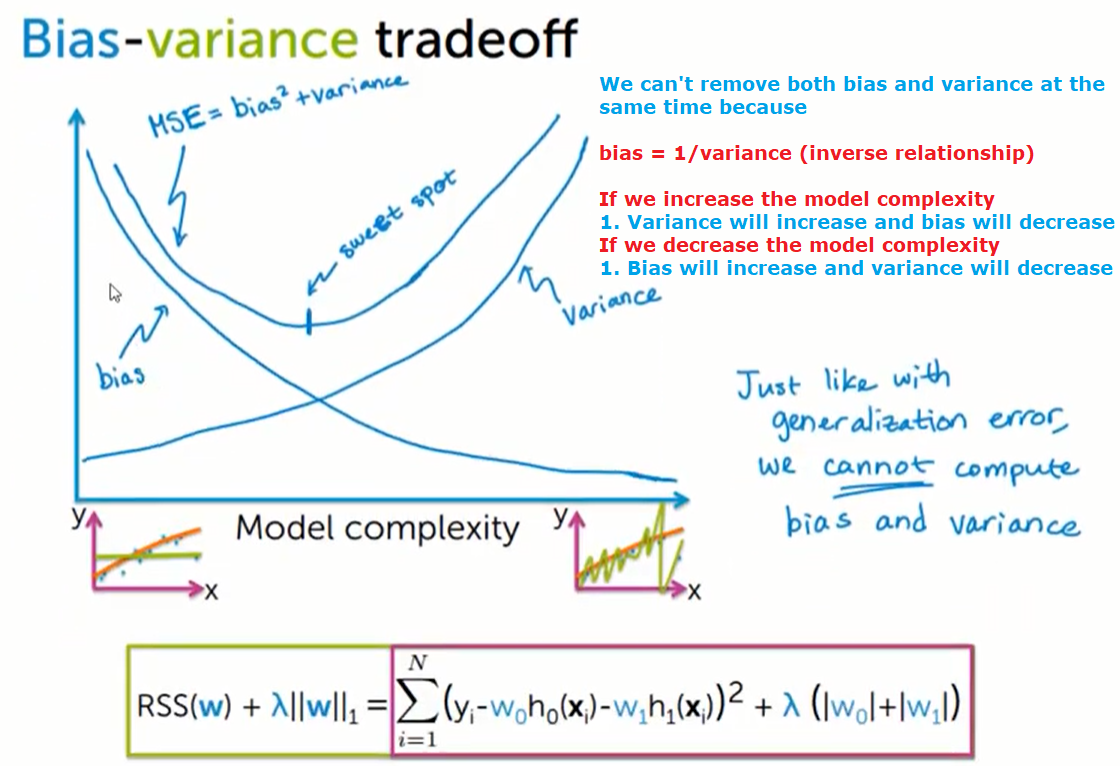

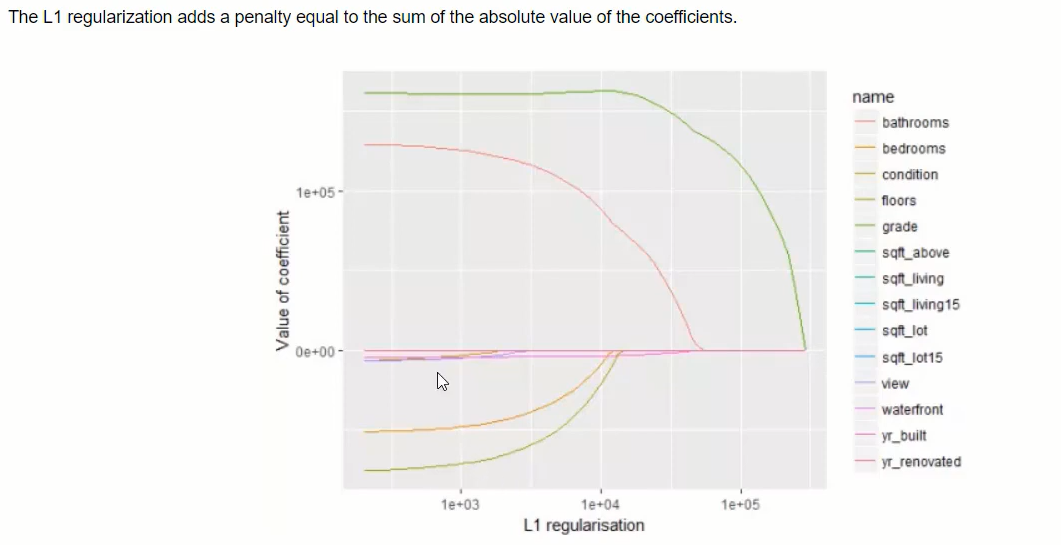

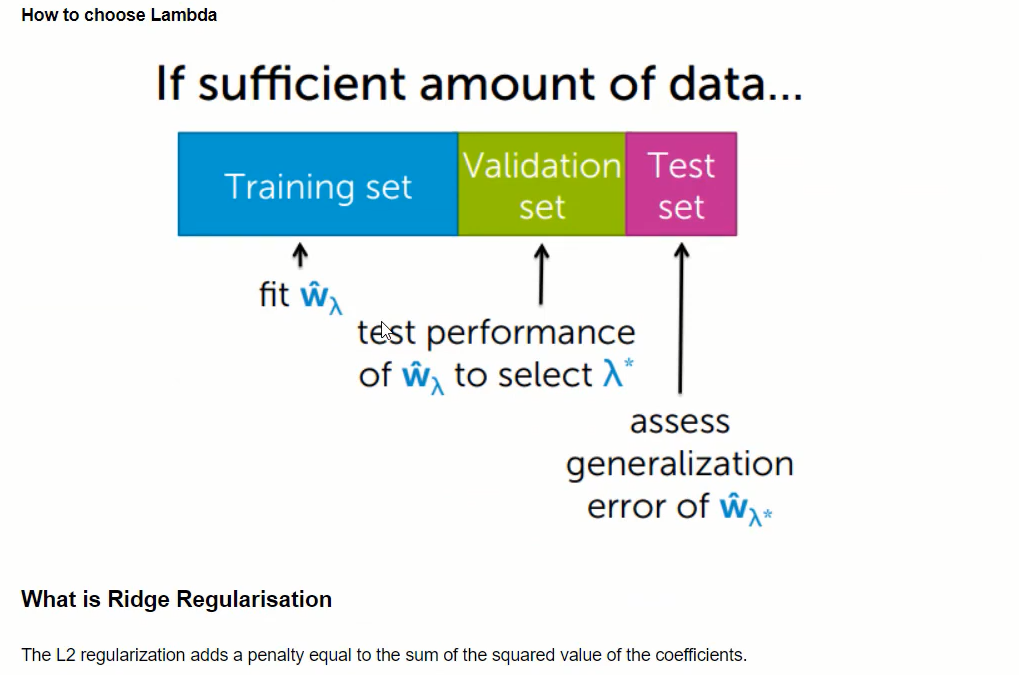

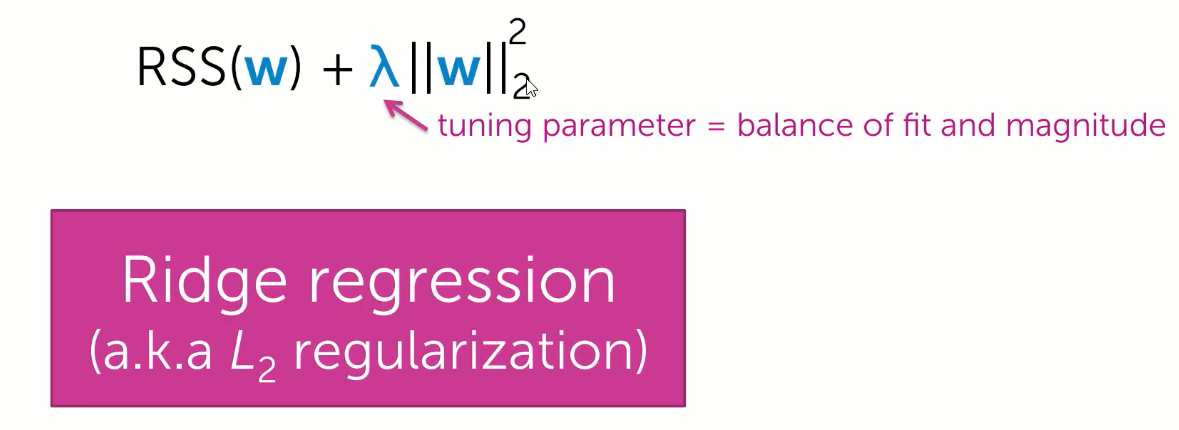

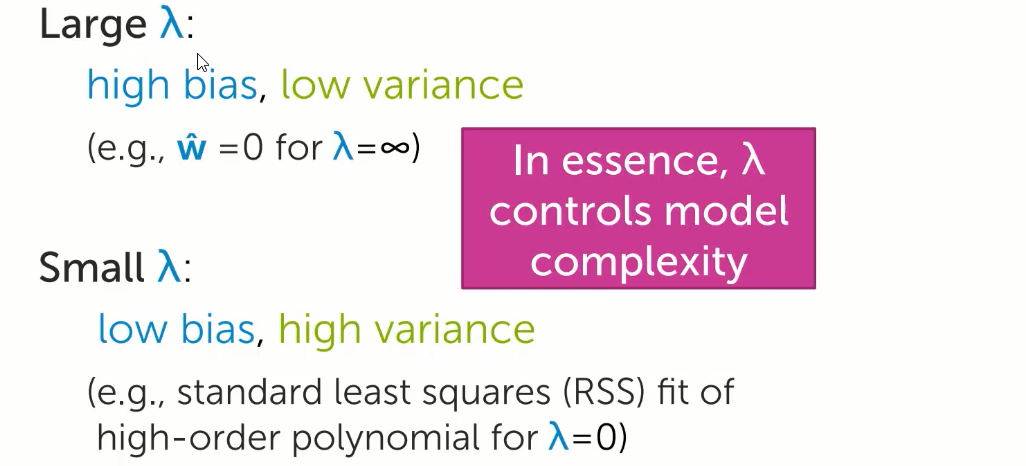

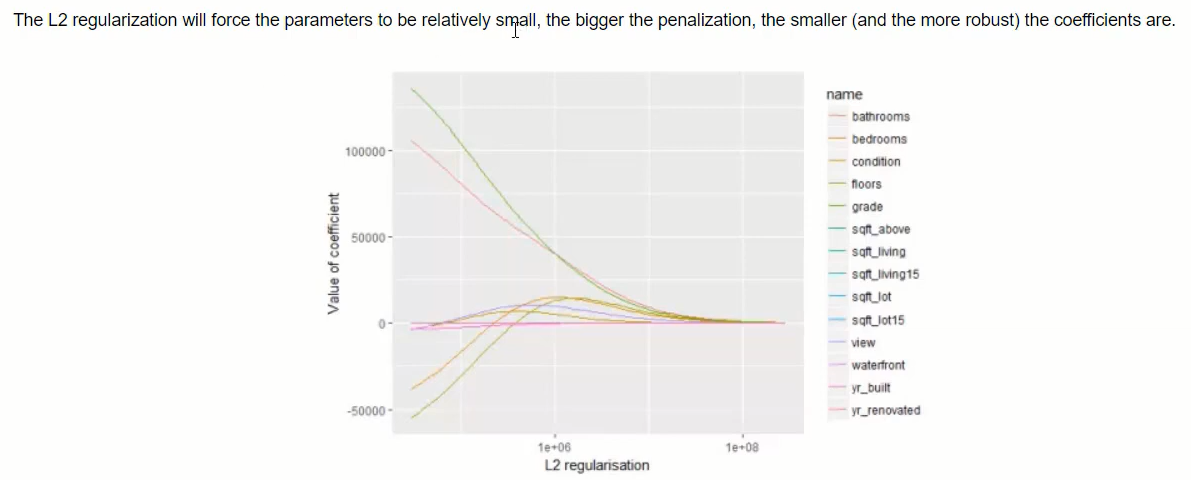

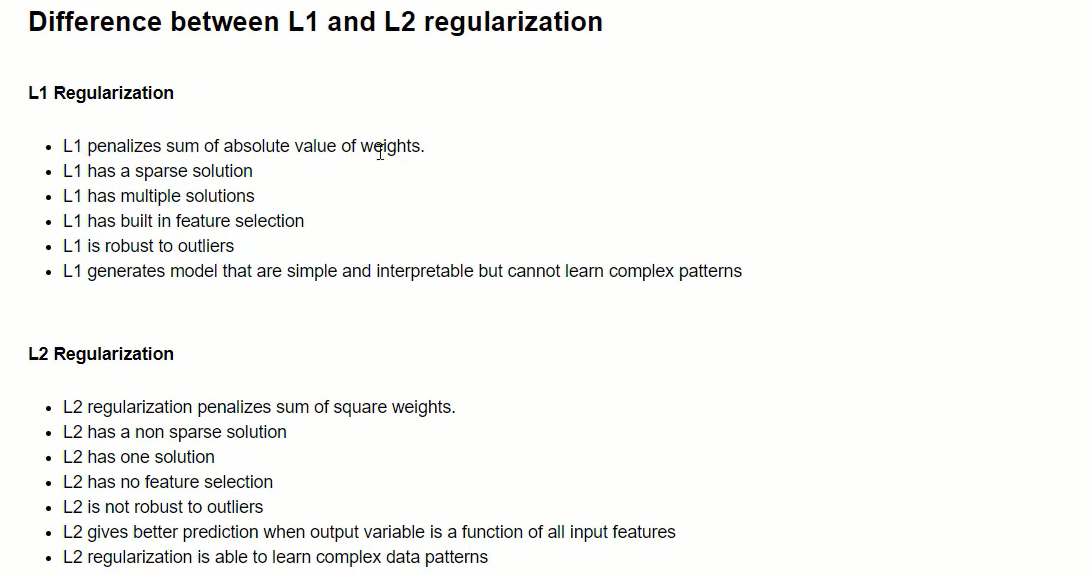

In [14]:
# Import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import chi2

In [16]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [17]:
titanic = sns.load_dataset('titanic')

In [18]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [19]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [20]:
# Drop variables having null values
titanic.drop(labels=['age','deck'], axis=1, inplace=True)

In [21]:
titanic = titanic.dropna()

In [22]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [23]:
y = titanic['survived']
# Drop variables having null values
titanic.drop(labels=['survived'], axis=1, inplace=True)
titanic.head()

,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,3,male,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,3,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,3,male,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [24]:
# Identify the categorical variables 
categorical_feature=[feature for feature in titanic if titanic[feature].dtypes=='O'] 
print("categorical Variables Count: {}".format(len(categorical_feature)))

# visualise the categorical variables
data = titanic[categorical_feature]
data.head()

categorical Variables Count: 5


,sex,embarked,who,embark_town,alive
0,male,S,man,Southampton,no
1,female,C,woman,Cherbourg,yes
2,female,S,woman,Southampton,yes
3,female,S,woman,Southampton,yes
4,male,S,man,Southampton,no


In [25]:
# Categorical Variables encoding
sex = {'male': 0, 'female': 1}
data['sex'] = data['sex'].map(sex)
embarked = {'S': 0, 'C': 1, 'Q': 2}
data['embarked'] = data['embarked'].map(embarked)
who = {'man': 0, 'woman': 1, 'child': 2}
data['who'] = data['who'].map(who)
embark_town = {'Southampton': 0, 'Cherbourg': 1, 'Queenstown': 2}
data['embark_town'] = data['embark_town'].map(embark_town)
alive = {'no': 0, 'yes': 1}
data['alive'] = data['alive'].map(alive)
data.head()

C:\Users\dell\AppData\Local\Temp/ipykernel_8436/1346009087.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sex'] = data['sex'].map(sex)
C:\Users\dell\AppData\Local\Temp/ipykernel_8436/1346009087.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['embarked'] = data['embarked'].map(embarked)
C:\Users\dell\AppData\Local\Temp/ipykernel_8436/1346009087.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,sex,embarked,who,embark_town,alive
0,0,0,0,0,0
1,1,1,1,1,1
2,1,0,1,0,1
3,1,0,1,0,1
4,0,0,0,0,0


In [26]:
X = data.copy()
X.shape, y.shape

((889, 5), (889,))

In [27]:
# Avoid overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Estimation of coefficients of Linear Regression

In [30]:
sel = SelectFromModel(LinearRegression())
sel.fit(X_train, y_train)

SelectFromModel(estimator=LinearRegression())

In [32]:
sel.get_support() # array of selected features

array([False, False, False, False,  True])

In [34]:
sel.estimator_.coef_

array([-5.44317430e-16,  1.63918444e-15, -1.11984726e-15, -1.91958193e-15,
        1.00000000e+00])

In [38]:
np.mean(np.abs(sel.estimator_.coef_))

0.20000000000000165

In [40]:
features = X_train.columns[sel.get_support()]
features # Selected features

Index(['alive'], dtype='object')

In [41]:
# Perform regularization
X_train_reg = sel.transform(X_train)
X_test_reg = sel.transform(X_test)

In [42]:
X_train_reg.shape, X_test_reg.shape

((711, 1), (178, 1))

## Build ML model and compare the performance of the selected features

In [43]:
# Function to calculate random forest ML accuracy
def run_random_forest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy:",accuracy_score(y_test, y_pred))

In [44]:
# Call random forest on cleaned selected features dataset

import time  
# store starting time
begin = time.time()
  
run_random_forest(X_train_reg, X_test_reg, y_train, y_test)

time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Time: {end - begin}")


Accuracy: 1.0
Time: 1.5114617347717285


In [46]:
# Call random forest on origional dataset

import time  
# store starting time
begin = time.time()
  
run_random_forest(X_train, X_test, y_train, y_test)

time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Time: {end - begin}")

Accuracy: 1.0
Time: 1.3592808246612549


### Logistics Regression Coefficient with L1 Regularization

In [50]:
sel = SelectFromModel(LogisticRegression(penalty='l1', C=0.05, solver='liblinear'))
sel.fit(X_train, y_train)
sel.get_support()

array([False, False, False, False,  True])

In [52]:
sel.estimator_.coef_

array([[0.        , 0.        , 0.        , 0.        , 4.82597858]])

In [53]:
np.mean(np.abs(sel.estimator_.coef_))

0.9651957159979025

In [51]:
features = X_train.columns[sel.get_support()]
features # Selected features

Index(['alive'], dtype='object')

In [54]:
# Perform regularization
X_train_l1 = sel.transform(X_train)
X_test_l1 = sel.transform(X_test)

In [55]:
X_train_l1.shape, X_test_l1.shape

((711, 1), (178, 1))

In [56]:
# Call random forest on cleaned selected features dataset

import time  
# store starting time
begin = time.time()
  
run_random_forest(X_train_l1, X_test_l1, y_train, y_test)

time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Time: {end - begin}")


Accuracy: 1.0
Time: 1.36838698387146


In [57]:
# Call random forest on origional dataset

import time  
# store starting time
begin = time.time()
  
run_random_forest(X_train, X_test, y_train, y_test)

time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Time: {end - begin}")

Accuracy: 1.0
Time: 1.3332624435424805


### Logistics Regression Coefficient with L2 Regularization

In [60]:
sel = SelectFromModel(LogisticRegression(penalty='l2', C=0.05, solver='liblinear'))
sel.fit(X_train, y_train)
sel.get_support()

array([False, False, False, False,  True])

In [61]:
sel.estimator_.coef_

array([[ 4.83296831e-01, -2.14647494e-03,  3.14750186e-01,
        -2.14647494e-03,  2.51254143e+00]])

In [62]:
np.mean(np.abs(sel.estimator_.coef_))

0.6629762800428315

In [63]:
features = X_train.columns[sel.get_support()]
features # Selected features

Index(['alive'], dtype='object')

In [65]:
# Perform regularization
X_train_l2 = sel.transform(X_train)
X_test_l2 = sel.transform(X_test)

In [66]:
X_train_l2.shape, X_test_l2.shape

((711, 1), (178, 1))

In [67]:
# Call random forest on cleaned selected features dataset

import time  
# store starting time
begin = time.time()
  
run_random_forest(X_train_l2, X_test_l2, y_train, y_test)

time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Time: {end - begin}")


Accuracy: 1.0
Time: 1.285855770111084


In [68]:
# Call random forest on origional dataset

import time  
# store starting time
begin = time.time()
  
run_random_forest(X_train, X_test, y_train, y_test)

time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Time: {end - begin}")

Accuracy: 1.0
Time: 1.2736048698425293
